# デシル分析

デシル分析は、大量のデータの概要を把握するために利用する。
とある変数でソートし、上位からグループを割り振り、レコードを10分割する。


## 参考資料
* https://www.albert2005.co.jp/knowledge/marketing/customer_product_analysis/decyl_rfm
* [aggregateに関して](http://entertainment-lab.blogspot.com/2009/10/aggregate.html)

In [1]:
(PurchasePrice <- c(10000, 20000, 3000, 0, 1500, 7000, 12000, 8000, 2000, 3000, 0, 300, 0, 8000, 4000, 0, 2000, 15000, 300, 1000))

[1] 10000 20000  3000     0  1500  7000 12000  8000  2000  3000     0   300
[13]     0  8000  4000     0  2000 15000   300  1000

In [2]:
length(PurchasePrice)

[1] 20

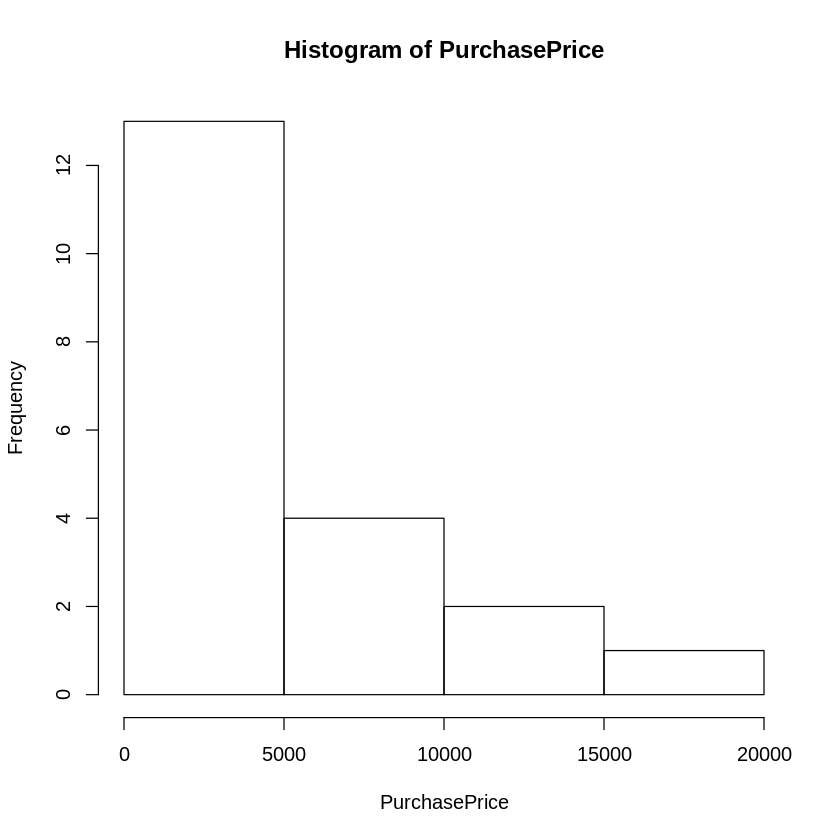

In [3]:
hist(PurchasePrice)

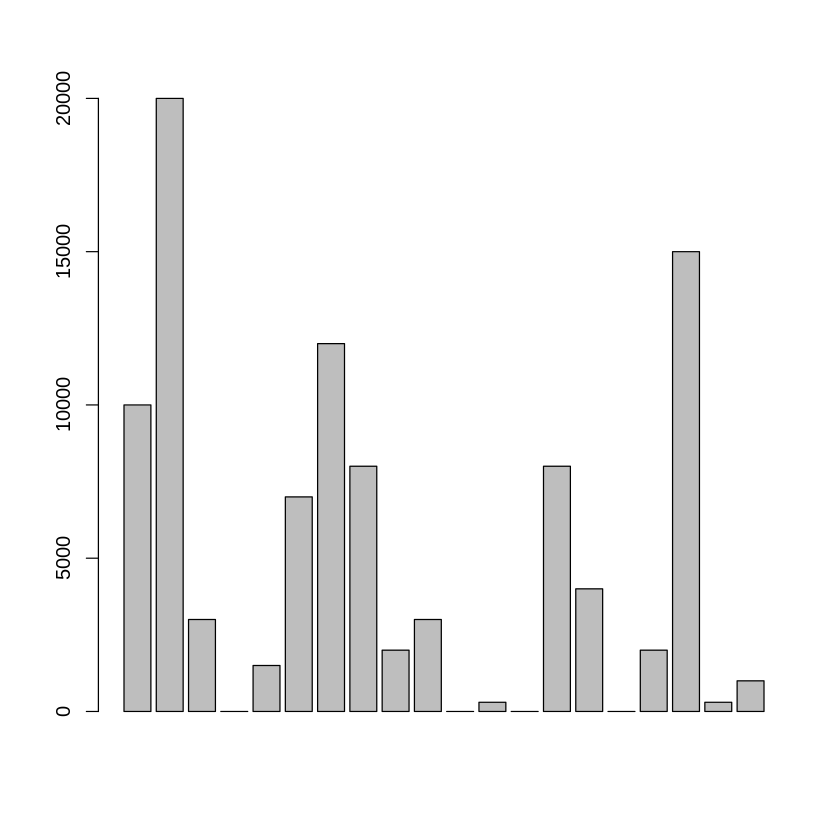

In [4]:
barplot(PurchasePrice)

In [5]:
d <- data.frame(n=1:length(PurchasePrice), PurchasePrice)
head(d)

n,PurchasePrice
1,10000
2,20000
3,3000
4,0
5,1500
6,7000


In [39]:
d2 <- d[order(-d$PurchasePrice), ]
head(d2)

,n,PurchasePrice
2,2,20000
18,18,15000
7,7,12000
1,1,10000
8,8,8000
14,14,8000


In [7]:
install.packages('qcc')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


# パレート図をみてみる

    
Pareto chart analysis for temp
        Frequency    Cum.Freq.   Percentage Cum.Percent.
  2  2.000000e+04 2.000000e+04 2.059732e+01 2.059732e+01
  18 1.500000e+04 3.500000e+04 1.544799e+01 3.604531e+01
  7  1.200000e+04 4.700000e+04 1.235839e+01 4.840371e+01
  1  1.000000e+04 5.700000e+04 1.029866e+01 5.870237e+01
  8  8.000000e+03 6.500000e+04 8.238929e+00 6.694130e+01
  14 8.000000e+03 7.300000e+04 8.238929e+00 7.518023e+01
  6  7.000000e+03 8.000000e+04 7.209063e+00 8.238929e+01
  15 4.000000e+03 8.400000e+04 4.119464e+00 8.650875e+01
  3  3.000000e+03 8.700000e+04 3.089598e+00 8.959835e+01
  10 3.000000e+03 9.000000e+04 3.089598e+00 9.268795e+01
  9  2.000000e+03 9.200000e+04 2.059732e+00 9.474768e+01
  17 2.000000e+03 9.400000e+04 2.059732e+00 9.680742e+01
  5  1.500000e+03 9.550000e+04 1.544799e+00 9.835221e+01
  20 1.000000e+03 9.650000e+04 1.029866e+00 9.938208e+01
  12 3.000000e+02 9.680000e+04 3.089598e-01 9.969104e+01
  19 3.000000e+02 9.710000e+04 3.089598e-01 1.000000

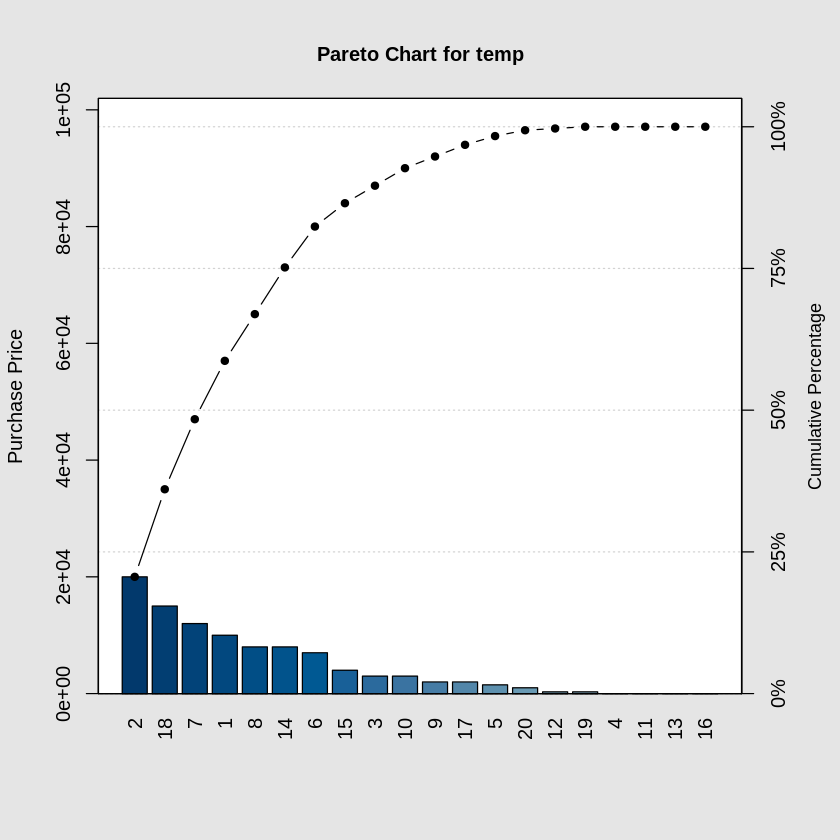

In [42]:
temp <- d2$PurchasePrice
names(temp) <- d2$n
qcc::pareto.chart(temp, ylab = "Purchase Price")

# 上位から順にグループ分け(10分割)

In [40]:
nd <- data.frame(n=d2$n, PurchasePrice=d2$PurchasePrice, group=rep(1:10, each=2))
head(nd)

n,PurchasePrice,group
2,20000,1
18,15000,1
7,12000,2
1,10000,2
8,8000,3
14,8000,3


In [37]:
(agg <- aggregate(PurchasePrice ~ group, data = nd, FUN=sum))

group,PurchasePrice
1,35000
2,22000
3,16000
4,11000
5,6000
6,4000
7,2500
8,600
9,0
10,0


# グループごとのパレート図

    
Pareto chart analysis for temp
        Frequency    Cum.Freq.   Percentage Cum.Percent.
  1  3.500000e+04 3.500000e+04 3.604531e+01 3.604531e+01
  2  2.200000e+04 5.700000e+04 2.265705e+01 5.870237e+01
  3  1.600000e+04 7.300000e+04 1.647786e+01 7.518023e+01
  4  1.100000e+04 8.400000e+04 1.132853e+01 8.650875e+01
  5  6.000000e+03 9.000000e+04 6.179197e+00 9.268795e+01
  6  4.000000e+03 9.400000e+04 4.119464e+00 9.680742e+01
  7  2.500000e+03 9.650000e+04 2.574665e+00 9.938208e+01
  8  6.000000e+02 9.710000e+04 6.179197e-01 1.000000e+02
  9  0.000000e+00 9.710000e+04 0.000000e+00 1.000000e+02
  10 0.000000e+00 9.710000e+04 0.000000e+00 1.000000e+02

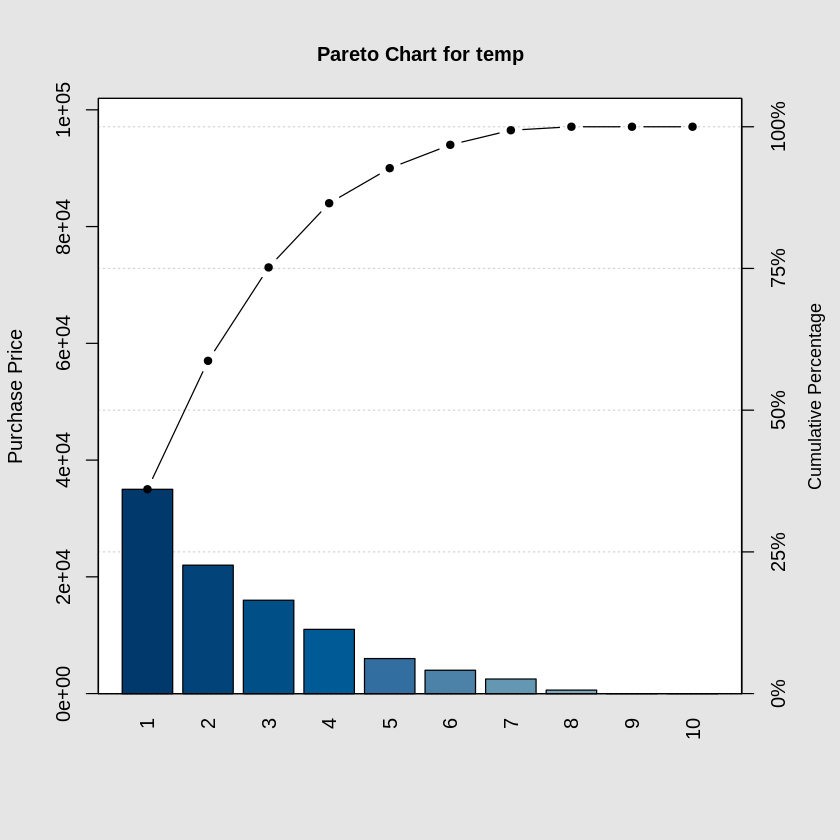

In [43]:
temp <- agg$PurchasePrice
names(temp) <- agg$group
qcc::pareto.chart(temp, ylab = "Purchase Price")

* 横軸は、デシルを表すグループである。
* 格差が大きいため、Purchase Priceは急速に下がっていく

# 分布の中央に最頻値がある場合

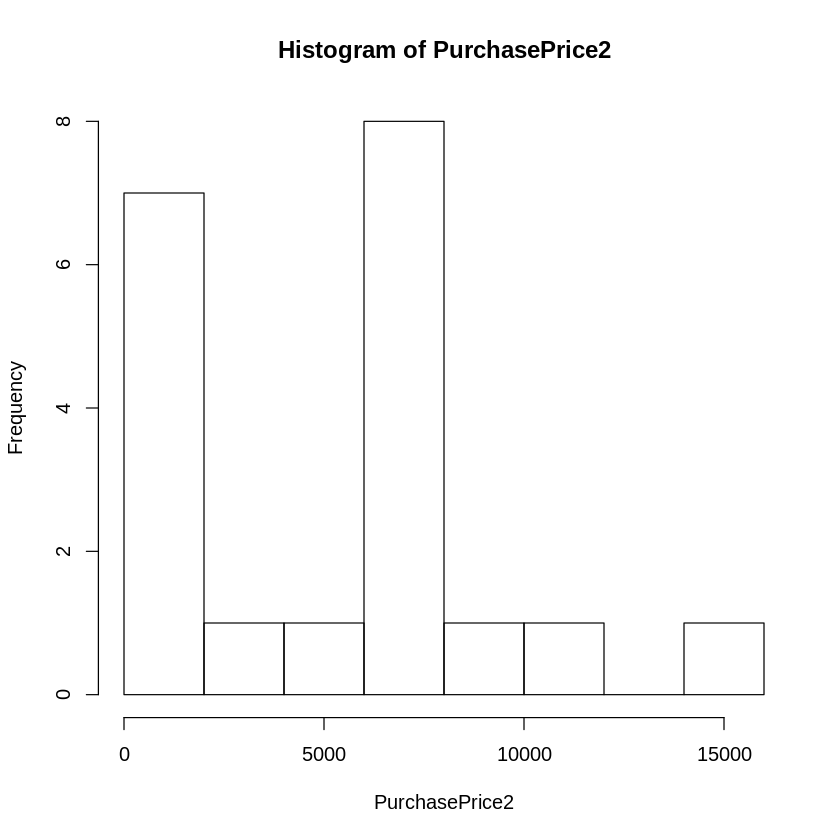

In [64]:
PurchasePrice2 <- c(10000, 7000, 7500, 0, 1500, 7000, 12000, 8000, 6000, 8000, 7000, 8000, 0, 8000, 4000, 0, 2000, 15000, 300, 1000)
hist(PurchasePrice2)

    
Pareto chart analysis for PurchasePrice2
        Frequency    Cum.Freq.   Percentage Cum.Percent.
  18 1.500000e+04 1.500000e+04 1.335708e+01 1.335708e+01
  7  1.200000e+04 2.700000e+04 1.068566e+01 2.404274e+01
  1  1.000000e+04 3.700000e+04 8.904720e+00 3.294746e+01
  8  8.000000e+03 4.500000e+04 7.123776e+00 4.007124e+01
  10 8.000000e+03 5.300000e+04 7.123776e+00 4.719501e+01
  12 8.000000e+03 6.100000e+04 7.123776e+00 5.431879e+01
  14 8.000000e+03 6.900000e+04 7.123776e+00 6.144256e+01
  3  7.500000e+03 7.650000e+04 6.678540e+00 6.812110e+01
  2  7.000000e+03 8.350000e+04 6.233304e+00 7.435441e+01
  6  7.000000e+03 9.050000e+04 6.233304e+00 8.058771e+01
  11 7.000000e+03 9.750000e+04 6.233304e+00 8.682102e+01
  9  6.000000e+03 1.035000e+05 5.342832e+00 9.216385e+01
  15 4.000000e+03 1.075000e+05 3.561888e+00 9.572573e+01
  17 2.000000e+03 1.095000e+05 1.780944e+00 9.750668e+01
  5  1.500000e+03 1.110000e+05 1.335708e+00 9.884239e+01
  20 1.000000e+03 1.120000e+05 8.904720e-0

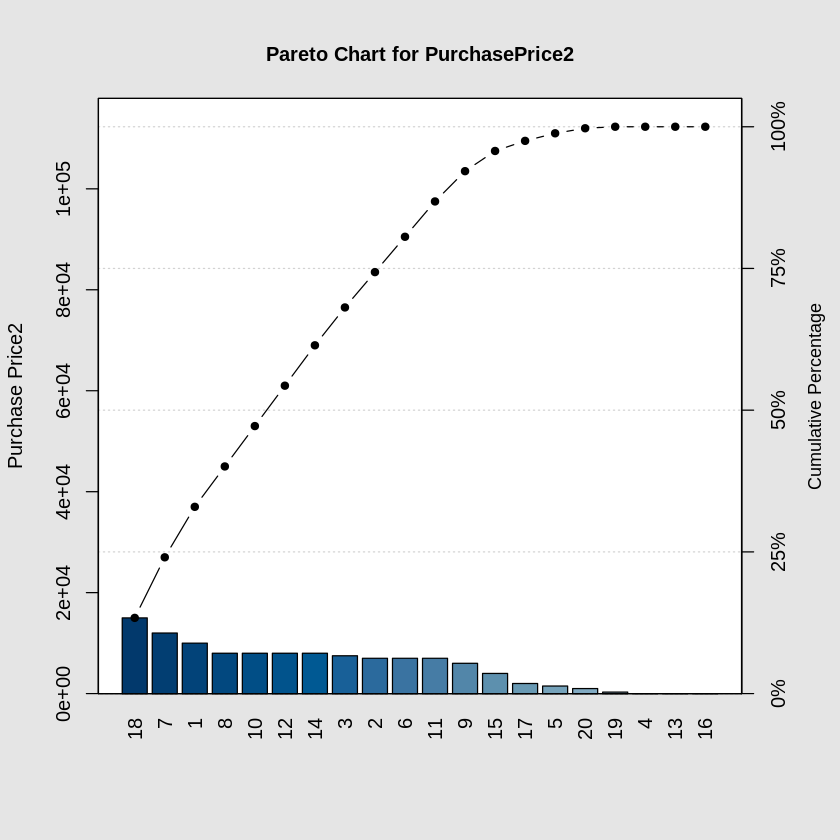

In [65]:
names(PurchasePrice2) <- 1:20
qcc::pareto.chart(PurchasePrice2, ylab = "Purchase Price2")

In [66]:
d2 <- data.frame(n=names(PurchasePrice2), PurchasePrice2=PurchasePrice2)
d2 <- cbind(d2[order(-d2$PurchasePrice2),], group=rep(1:10, each=2))
(agg2 <- aggregate(PurchasePrice2 ~ group, data = d2, FUN=sum))

group,PurchasePrice2
1,27000
2,18000
3,16000
4,15500
5,14000
6,13000
7,6000
8,2500
9,300
10,0


    
Pareto chart analysis for temp2
        Frequency    Cum.Freq.   Percentage Cum.Percent.
  1  2.700000e+04 2.700000e+04 2.404274e+01 2.404274e+01
  2  1.800000e+04 4.500000e+04 1.602850e+01 4.007124e+01
  3  1.600000e+04 6.100000e+04 1.424755e+01 5.431879e+01
  4  1.550000e+04 7.650000e+04 1.380232e+01 6.812110e+01
  5  1.400000e+04 9.050000e+04 1.246661e+01 8.058771e+01
  6  1.300000e+04 1.035000e+05 1.157614e+01 9.216385e+01
  7  6.000000e+03 1.095000e+05 5.342832e+00 9.750668e+01
  8  2.500000e+03 1.120000e+05 2.226180e+00 9.973286e+01
  9  3.000000e+02 1.123000e+05 2.671416e-01 1.000000e+02
  10 0.000000e+00 1.123000e+05 0.000000e+00 1.000000e+02

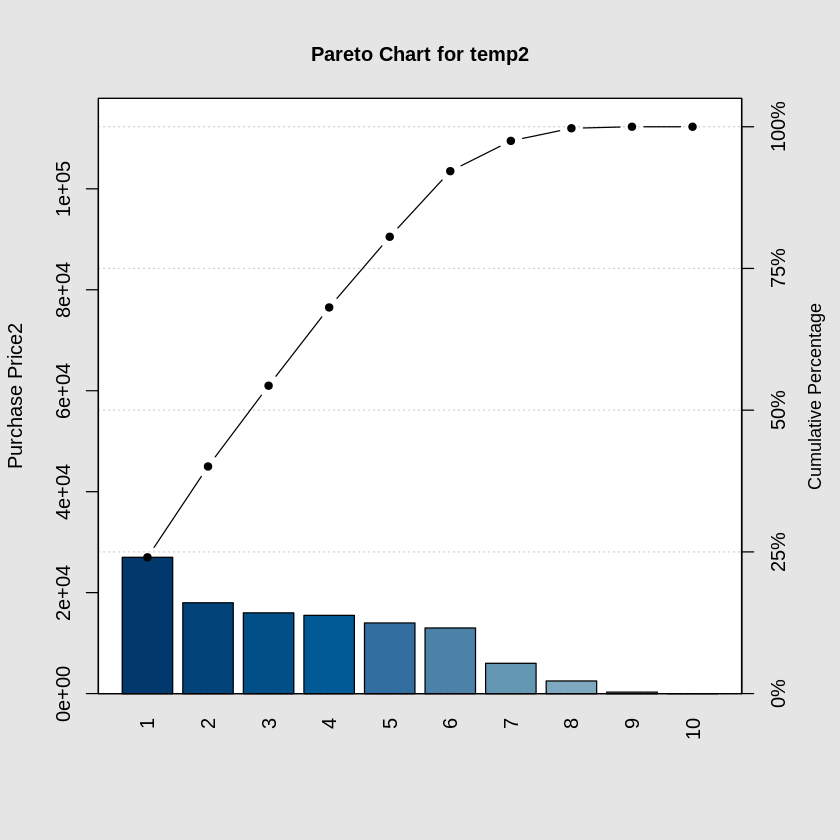

In [67]:
temp2 <- agg2$PurchasePrice
names(temp2) <- agg2$group
qcc::pareto.chart(temp2, ylab = "Purchase Price2")

* 横軸はデシルグループ
* 格差が少なくなると、水平に近くなる(2,3,4,5,6)